/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5712 - loss: 1.0089 - val_accuracy: 0.7000 - val_loss: 0.7659
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6288 - loss: 0.8217 - val_accuracy: 0.7333 - val_loss: 0.6189
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6620 - loss: 0.7175 - val_accuracy: 0.8000 - val_loss: 0.5125
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8179 - loss: 0.5044 - val_accuracy: 0.8333 - val_loss: 0.4372
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8378 - loss: 0.4788 - val_accuracy: 0.8667 - val_loss: 0.3840
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8294 - loss: 0.4364 - val_accuracy: 0.9000 - val_loss: 0.3425
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8575 - loss: 0.4080 - val_accuracy: 0.9000 - val_loss: 0.3102
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8990 - loss: 0.3055 - val_accuracy: 0.9000 - val_

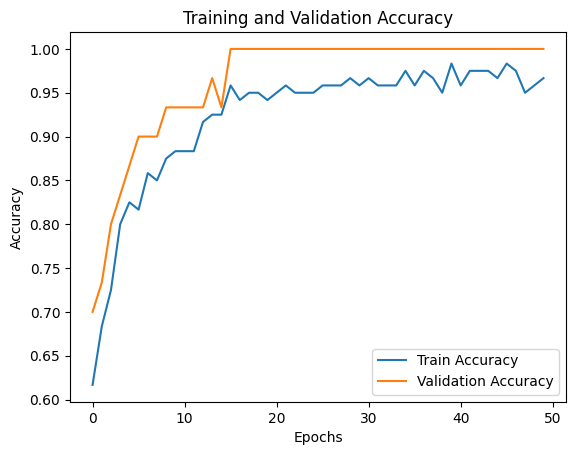

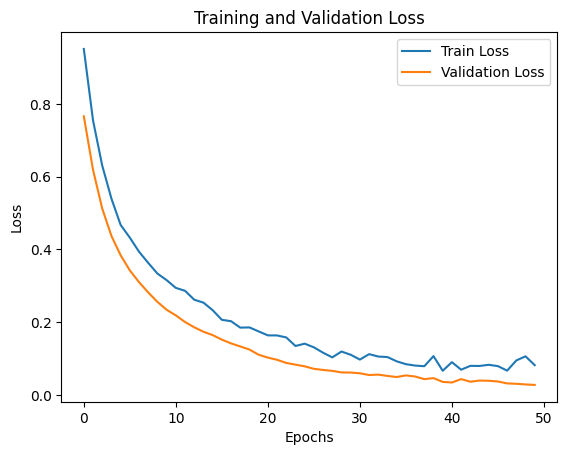

ANN Visualizer is not installed. Skipping visualization.


In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical  # Corrected import for np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # Example with Iris dataset
import matplotlib.pyplot as plt

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Encode the target variable into categorical format
y_encoded = to_categorical(y)  # Convert to one-hot encoded format

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build the Sequential Model
model = Sequential()
# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
# Second hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Visualize the ANN Model (optional)
try:
    from ann_visualizer.visualize import ann_viz
    # Visualize the model
    ann_viz(model, title="Iris Classification Neural Network")
except ImportError:
    print("ANN Visualizer is not installed. Skipping visualization.")
